# Gibbs with conditional a conjugate

##### Keywords: conjugate prior, gibbs sampler, MCMC,  binomial, beta, beta-binomial

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import norm, gamma
from scipy.stats import distributions
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set_style('whitegrid')
sns.set_context('poster')

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Summary

Gibbs sampler for a model in which  one of the conditionals look like a distribution which is part of a conjugate pair. In this case we can use Bayes theorem to get the other conditional by multiplying the known conditional by a marginal which is the other part of the conjugate pair. Our example involves a $Binom$ conditional. Multiplying by a $Beta$ marginal leaves us with the other conditional as another $Beta$.

---

## Contents
{:.no_toc}
* 
{: toc}

We now going to take a look at a slightly more complicated case that was originally outlined in full generality by Casella and George (1992). Suppose we have a nasty looking joint distribution given as: 

$$p(x,y) = \binom{16}{y} x^{y+1} (1-x)^{19-y}$$

## Looks like a binomial

For such a situation the *two* conditional distributions are not exactly obvious. Clearly we have a binomial term staring at us, so we should be looking to try and express part of the function as a binomial of the form, 

$$p(\theta \vert \pi ) = \binom{n}{\theta} \pi^{\theta} (1-\pi)^{n-\theta}$$

It follows directly that for our example we have a binomial with $n=16$ and $\theta =y$, 

$$p( y \vert x ) = g(x) \binom{16}{y} x^{y+1} (1-x)^{16-y} .$$

### The  $ x\vert y$ conditional

So, now we need the conditional for x|y, and we know from Bayes' theorem that :

$$p(x \vert y) = \frac{p(y \vert x)p(x)}{p(y)} $$

so what we should be looking for is a conjugate prior to a Binomial distribution, which is of course a Beta distibution:

$$Beta(\alpha,\beta) = x^{\alpha-1}(1-x)^{\beta-1}$$

With this intuition in mind, the math is now trivial:

$$p(x \vert y) = h(y) x^{\alpha + y - 1}(1-x)^{\beta + n - y -1}$$

which for our example question is simply:

$$p(x \vert y) \sim Beta(y+\alpha,n-y+\beta)$$

with $\alpha=2$ and $\beta=4$.

## The sampler

With our conditionals formulated, we can move directly to our Gibbs sampler.

In [2]:
from scipy.stats import binom, beta
n=16
alph=2.
bet=4.


def gibbs(N=10000,thin=50):
    x=1
    y=1
    samples=np.zeros((N,2))
    for i in range(N):
        for j in range(thin):
            y=binom.rvs(n,x)
            newalph=y+alph
            newbet=n-y+bet
            x=beta.rvs(newalph, newbet)
          
        samples[i,0]=x
        samples[i,1]=y
    return samples

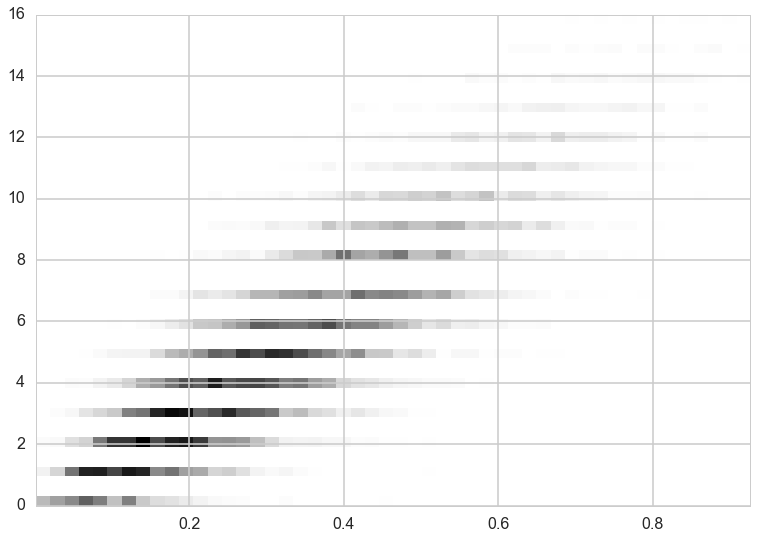

In [3]:
out=gibbs()
plt.hist2d(out[:,0],out[:,1], normed=True, bins=50)
plt.show()